In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil 
from matplotlib.colors import LinearSegmentedColormap

import warnings
warnings.filterwarnings("ignore")

import logging
logging.getLogger('matplotlib.font_manager').disabled = True

pd.set_option("display.max_columns", None)

In [70]:
random_state = 123
# outlier_limit = 99.5
sns.set()
sns.set_context("paper")
sns.set(style="white")

plt.rcParams['figure.dpi'] = 98

colors = ['#646E78','#d1d646', '#97bf78', '#7ca282', '#61858c', '#466796', '#8967b5', '#b363b9', '#d560bc', '#f25dbf']

show_plots = True
save_plots = False
img_counter = 0
kaggle = False
div_colors = ['#466796','#9ca9c3','#f1f1f1','#e5e39f','#d1d646']
div_cmap = LinearSegmentedColormap.from_list("mycmap", div_colors)

# def transform_dataypes(df, has_y=True) :
#     df['Date'] = pd.to_datetime(df['Date'])
#     df['Browser'] = df['Browser'].astype('str')
#     df['Type_of_Traffic'] = df['Type_of_Traffic'].astype('str')
#     if has_y == True:
#         df['Buy'] = df['Buy'].astype('bool')

#     return df

def log_transform_data(df, col):
    return np.log1p(df[col])

## Function to plot histograms of numeric features for specified dataframe
def plotHistograms(df, features, rows=4, title = "Histograms of Numeric Variables"):
    if show_plots:
        fig, axes = plt.subplots(rows, ceil(len(features) / rows), \
                             figsize=(11, 3*rows), constrained_layout=True, sharey=True)
        
        for ax, feat in zip(axes.flatten(), features):
            ax.set_title(feat, y=1)
            ax.legend()
            df.pivot(columns='Buy')[feat].plot(kind = 'hist', stacked=True, ax=ax, color=colors[0:2])
    
        if (len(axes.flatten())) > len(features):
            for f in range(len(axes.flatten())-len(features)):
                axes.flatten()[(f+1)*-1].axis('off')
        plt.suptitle(title)
        plt.show()
    else:
        print("show_plots is currently set to False")

## Function to plot histograms of numeric features for specified dataframe
def plot_histograms_boxplots(df, features, rows=4, title = "Histograms of Numeric Variables"):
    if show_plots:
        fig = plt.figure(figsize=(11, 4*rows), constrained_layout=True)
        subfigs = fig.subfigures(rows, ceil(len(features) / rows))
    
        for subf, feat in zip(subfigs.flatten(), features):
            axs = subf.subplots(3, 1, sharex=True, gridspec_kw={'height_ratios': [4, 1,1]})
        
            df.pivot(columns='Buy')[feat].plot(kind = 'hist', stacked=True, ax=axs[0], color=colors[0:2])
            axs[0].set_ylabel(None)
            axs[0].set_title(feat, y=1)
        
            sns.boxplot(x=df.loc[df['Buy']==0,feat], ax=axs[1], color=colors[0], fliersize=2)
            axs[1].set_xlabel(None)
        
            sns.boxplot(x=df.loc[df['Buy']==1,feat], ax=axs[2], color=colors[1], fliersize=2)
            axs[2].set_xlabel(None)
        
            subf.suptitle(None)

        plt.suptitle(title)
        plt.show()
        if save_plots:
            save_fig(title, fig)
    else:
        print("show_plots is currently set to False")



def make_corr_heatmap(d_X, d_y, method, title="Triangle Correlation Heatmap"):
    if show_plots:
        fig, ax = plt.subplots(figsize=(13, 7))
    
        map_corr = np.round(d_X.join(d_y).corr(method=method),decimals=2)
    
        mask_annot = np.absolute(map_corr.values) >= 0.65
        annot = np.where(mask_annot, map_corr.values, np.full(map_corr.shape,"")) # Try to understand what this np.where() does
        mask = np.triu(np.ones_like(map_corr, dtype=bool))
    
        heatmap = sns.heatmap(map_corr, mask=mask, vmin=-1, vmax=1, annot=annot, cmap=div_cmap, fmt='')
        heatmap.set_title(title, fontdict={'fontsize':18}, pad=16);
        if save_plots:
            save_fig(title, fig)
    else:
        print("show_plots is currently set to False")



def save_fig(title, fig, dest='img/', img_counter=img_counter):
    img_counter = img_counter + 1
    fn = dest + str(img_counter) + '_' + title.replace(' ','-') + '.png'
    fig.savefig(fn, bbox_inches='tight')
    
def plot_cat_counts(df, features, rows=6, title = "Count Distributions of Categorical Variables"):
    if show_plots:
        fig = plt.figure(figsize=(2.85*rows, 4*rows), constrained_layout=True)
        subfigs = fig.subfigures(rows, ceil(len(features) / rows), wspace=0.07, hspace=0.1)
    
        for subf, feat in zip(subfigs.flatten(), features):
            axs = subf.subplots(1, 2, sharey=True) #, gridspec_kw={'width_ratios': [4, 1,1]})
 
            df1 = df.groupby([feat,'IsCanceled']).size().unstack(1)\
                .plot(kind="barh", stacked=True, ax=axs[0], color=colors)

            df2 = df.groupby([feat,'IsCanceled']).size().unstack(1)
            df2.div(df2.sum(axis=1), axis=0)\
                .plot(kind="barh", stacked=True, ax=axs[1], color=colors)
            
            subf.suptitle(feat)
            

        plt.suptitle(title)
        plt.show()
        if save_plots:
            save_fig(title, fig)

    else:
        print("show_plots is currently set to False")

In [ ]:
# data_train_num = data_train.select_dtypes(include=np.number).set_index(data_train.index)
# data_train_cat = data_train.select_dtypes(exclude=np.number).set_index(data_train.index).drop("Buy", axis = 1)
# num_feat = data_train_num.columns.tolist()
# cat_feat = data_train_cat.columns.tolist()

# data_test_num = data_test.select_dtypes(include=np.number).set_index(data_test.index)
# data_test_cat = data_test.select_dtypes(exclude=np.number).set_index(data_test.index)

In [ ]:
# original_cat_feats = data_train.select_dtypes(exclude=np.number).columns.tolist()

# plot_cat_counts(data_train, original_cat_feats)

In [ ]:
# plot_histograms_boxplots(data_train, num_feat, rows=4)

In [2]:
data = pd.read_csv("H2.csv")
data

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.00,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,2017,August,35,30,2,5,2,0.0,...,No Deposit,394,NULL,0,Transient,96.14,0,0,Check-Out,2017-09-06
79326,0,102,2017,August,35,31,2,5,3,0.0,...,No Deposit,9,NULL,0,Transient,225.43,0,2,Check-Out,2017-09-07
79327,0,34,2017,August,35,31,2,5,2,0.0,...,No Deposit,9,NULL,0,Transient,157.71,0,4,Check-Out,2017-09-07
79328,0,109,2017,August,35,31,2,5,2,0.0,...,No Deposit,89,NULL,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

In [4]:
metric_features = data.select_dtypes(include=np.number).set_index(data.index).columns
metric_features = metric_features.drop("IsCanceled")
data[metric_features]

,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
0,6,2015,27,1,0,2,1,0.0,0,0,0,0,0,0,0.00,0,0
1,88,2015,27,1,0,4,2,0.0,0,0,0,0,0,0,76.50,0,1
2,65,2015,27,1,0,4,1,0.0,0,0,0,0,0,0,68.00,0,1
3,92,2015,27,1,2,4,2,0.0,0,0,0,0,0,0,76.50,0,2
4,100,2015,27,2,0,2,2,0.0,0,0,0,0,0,0,76.50,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,0,96.14,0,0
79326,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,0,225.43,0,2
79327,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,0,157.71,0,4
79328,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,0,104.40,0,0


In [40]:
categorical_features = data.select_dtypes(exclude=np.number).set_index(data.index).columns
data[categorical_features]

,ArrivalDateMonth,Meal,Country,MarketSegment,DistributionChannel,ReservedRoomType,AssignedRoomType,DepositType,Agent,Company,CustomerType,ReservationStatus,ReservationStatusDate
0,July,HB,PRT,Offline TA/TO,TA/TO,A,A,No Deposit,6,NULL,Transient,Check-Out,2015-07-03
1,July,BB,PRT,Online TA,TA/TO,A,A,No Deposit,9,NULL,Transient,Canceled,2015-07-01
2,July,BB,PRT,Online TA,TA/TO,A,A,No Deposit,9,NULL,Transient,Canceled,2015-04-30
3,July,BB,PRT,Online TA,TA/TO,A,A,No Deposit,9,NULL,Transient,Canceled,2015-06-23
4,July,BB,PRT,Online TA,TA/TO,A,A,No Deposit,9,NULL,Transient,Canceled,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,394,NULL,Transient,Check-Out,2017-09-06
79326,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,9,NULL,Transient,Check-Out,2017-09-07
79327,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,9,NULL,Transient,Check-Out,2017-09-07
79328,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,89,NULL,Transient,Check-Out,2017-09-07


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
IsCanceled,79330.0,0.417270,0.493111,0.0,0.0,0.0,1.0,1.0
LeadTime,79330.0,109.735724,110.948526,0.0,23.0,74.0,163.0,629.0
ArrivalDateYear,79330.0,2016.174285,0.699181,2015.0,2016.0,2016.0,2017.0,2017.0
ArrivalDateWeekNumber,79330.0,27.177449,13.398523,1.0,17.0,27.0,38.0,53.0
ArrivalDateDayOfMonth,79330.0,15.786625,8.728451,1.0,8.0,16.0,23.0,31.0
StaysInWeekendNights,79330.0,0.795185,0.885026,0.0,0.0,1.0,2.0,16.0
StaysInWeekNights,79330.0,2.182957,1.456416,0.0,1.0,2.0,3.0,41.0
Adults,79330.0,1.850977,0.509292,0.0,2.0,2.0,2.0,4.0
Children,79326.0,0.091370,0.372177,0.0,0.0,0.0,0.0,3.0
Babies,79330.0,0.004941,0.084323,0.0,0.0,0.0,0.0,10.0


In [7]:
"Percentage of suspect duplicated data: ", (data.duplicated().sum() / len(data)) * 100

('Percentage of suspect duplicated data: ', 32.65095172066053)

In [26]:
duplicates = data.loc[data.duplicated()]
duplicates = duplicates.groupby(duplicates.columns.tolist(),as_index=False).size().sort_values("size", ascending = False)
size = duplicates.pop("size")
duplicates.insert(0, "size", size)
duplicates

,size,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
5404,179,1,277,2016,November,46,7,1,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,NULL,NULL,0,Transient,100.00,0,0,Canceled,2016-04-04
4181,149,1,68,2016,February,8,17,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,1,0,A,A,0,Non Refund,37,NULL,0,Transient,75.00,0,0,Canceled,2016-01-06
5075,108,1,188,2016,June,25,15,0,2,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,Non Refund,119,NULL,39,Transient,130.00,0,0,Canceled,2016-01-18
4879,100,1,158,2016,May,22,24,0,2,1,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,37,NULL,31,Transient,130.00,0,0,Canceled,2016-01-18
3850,99,1,34,2015,December,50,8,0,2,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,1,0,A,A,0,Non Refund,19,NULL,0,Transient,90.00,0,0,Canceled,2015-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,1,0,59,2017,April,17,26,0,1,2,0.0,0,BB,CHE,Direct,Direct,0,0,0,D,D,0,No Deposit,14,NULL,0,Transient,130.50,0,2,Check-Out,2017-04-27
1478,1,0,59,2017,April,14,6,0,3,2,0.0,0,BB,ISR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,117.00,0,2,Check-Out,2017-04-09
3383,1,0,409,2017,May,22,31,0,3,2,0.0,0,BB,AUS,Groups,TA/TO,0,0,0,A,A,0,No Deposit,229,NULL,0,Transient-Party,112.67,0,2,Check-Out,2017-06-03
3385,1,0,409,2017,May,22,31,0,3,2,0.0,0,BB,GBR,Groups,TA/TO,0,0,0,A,A,0,No Deposit,229,NULL,0,Transient-Party,112.67,0,2,Check-Out,2017-06-03


In [32]:
#Exploring the day with most populated duplicates
data.loc[(data.ArrivalDateDayOfMonth == 7) & 
(data.ArrivalDateMonth == "November") & 
(data.ArrivalDateYear == 2016) & 
(data.MarketSegment == "Groups")
].value_counts("LeadTime")

LeadTime
277    180
626     30
3        5
dtype: int64

In [20]:
data.loc[(data.ArrivalDateDayOfMonth == 7) & 
(data.ArrivalDateMonth == "November") & 
(data.ArrivalDateYear == 2016) & 
(data.MarketSegment == "Groups")
].value_counts("Agent")

Agent
       NULL    180
          1     30
         37      5
dtype: int64

In [12]:
data.loc[(data.ArrivalDateDayOfMonth == 7) & 
(data.ArrivalDateMonth == "November") & 
(data.ArrivalDateYear == 2016)
].value_counts("MarketSegment")

MarketSegment
Groups           215
Online TA         86
Direct             7
Offline TA/TO      5
Corporate          4
Aviation           2
Complementary      1
dtype: int64

In [22]:
data.loc[data.duplicated()].sort_values("ArrivalDateDayOfMonth")

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
23073,1,56,2017,February,5,1,0,3,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,29,NULL,0,Transient,60.00,0,0,Canceled,2016-12-07
23105,1,56,2017,February,5,1,0,3,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,29,NULL,0,Transient,60.00,0,0,Canceled,2016-12-07
23104,1,56,2017,February,5,1,0,3,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,29,NULL,0,Transient,60.00,0,0,Canceled,2016-12-07
23103,1,56,2017,February,5,1,0,3,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,29,NULL,0,Transient,60.00,0,0,Canceled,2016-12-07
23102,1,56,2017,February,5,1,0,3,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,29,NULL,0,Transient,60.00,0,0,Canceled,2016-12-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36391,1,379,2015,October,44,31,1,1,2,0.0,0,BB,PRT,Groups,TA/TO,0,1,0,A,A,0,Non Refund,1,NULL,0,Transient,62.00,0,0,Canceled,2015-07-23
36390,1,379,2015,October,44,31,1,1,2,0.0,0,BB,PRT,Groups,TA/TO,0,1,0,A,A,0,Non Refund,1,NULL,0,Transient,62.00,0,0,Canceled,2015-07-23
36389,1,379,2015,October,44,31,1,1,2,0.0,0,BB,PRT,Groups,TA/TO,0,1,0,A,A,0,Non Refund,1,NULL,0,Transient,62.00,0,0,Canceled,2015-07-23
36387,1,379,2015,October,44,31,1,1,2,0.0,0,BB,PRT,Groups,TA/TO,0,1,0,A,A,0,Non Refund,1,NULL,0,Transient,62.00,0,0,Canceled,2015-07-23


In [7]:
data.isna().sum(axis = 0).loc[data.isna().sum(axis = 0) > 0]

Children     4
Country     24
dtype: int64

In [8]:
data["Children"].value_counts()

0.0    74220
1.0     3023
2.0     2024
3.0       59
Name: Children, dtype: int64

In [9]:
data["Country"].value_counts()

PRT    30960
FRA     8804
DEU     6084
GBR     5315
ESP     4611
       ...  
MMR        1
UMI        1
NIC        1
VGB        1
COM        1
Name: Country, Length: 166, dtype: int64

In [10]:
# Replacing NaN values with the mode 

data["Children"].replace(np.nan, data["Children"].mode()[0], inplace = True)
data["Country"].replace(np.nan, data["Country"].mode()[0], inplace = True)

data.loc[(data["Children"].isna() == True) | (data["Country"].isna() == True)]

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate


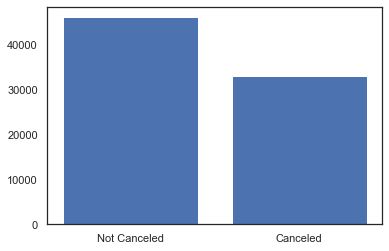

In [11]:
sns.set(style = "white")
plt.bar(height=data["IsCanceled"].value_counts(), x = ["Not Canceled", "Canceled"])
plt.show()

In [12]:
def pairwise_relation(data, title = "Pairwise Relationship of Metric Variables", target = "IsCanceled"):
    metric_features = data.select_dtypes(include=np.number).set_index(data.index).columns
    # Pairwise Relationship of Numerical Variables
    sns.set(style='white')

    # Setting pairplot
    sns.pairplot(data[metric_features], diag_kind="hist", hue=target)

    # Layout
    plt.subplots_adjust(top=0.95)
    plt.suptitle(title)

    plt.show()

In [19]:
#around 35 minutes or run time

# pairwise_relationship(data)

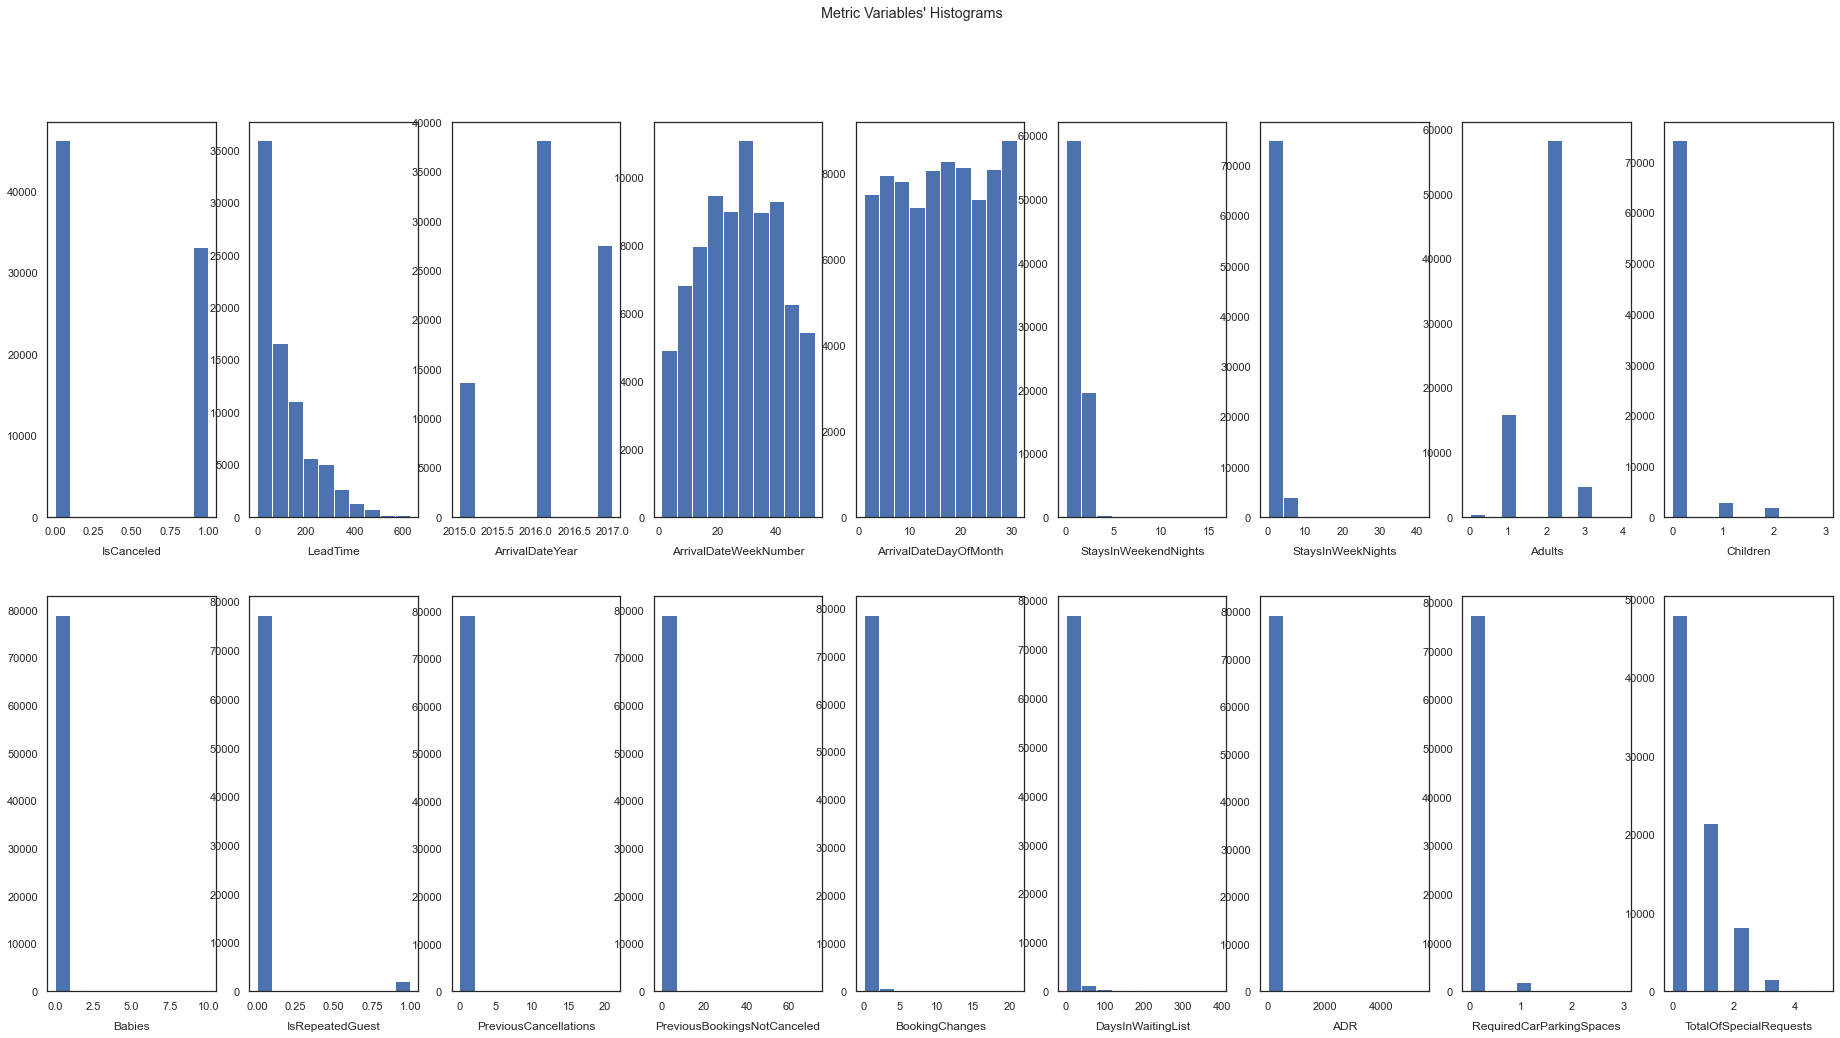

In [15]:
sns.set(style='white')

fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(32, 16))

for ax, feat in zip(axes.flatten(), metric_features):
    ax.hist(data[feat])
    ax.set_title(feat, y=-0.11)
    
title = "Metric Variables' Histograms"
plt.suptitle(title)
plt.show()

In [16]:
def boxplot (data):
    
    metric_features = data.select_dtypes(include=np.number).set_index(data.index).columns
    sns.set(style = 'white')
    fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))
    
    for ax, feat in zip(axes.flatten(), metric_features): 

        sns.boxplot(data[feat], ax = ax)
        
    title = "Metric Variables' Boxplots"

    plt.suptitle(title)

    plt.show()

C:\Users\emanu\anaconda3\envs\bcases\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\emanu\anaconda3\envs\bcases\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\emanu\anaconda3\envs\bcases\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

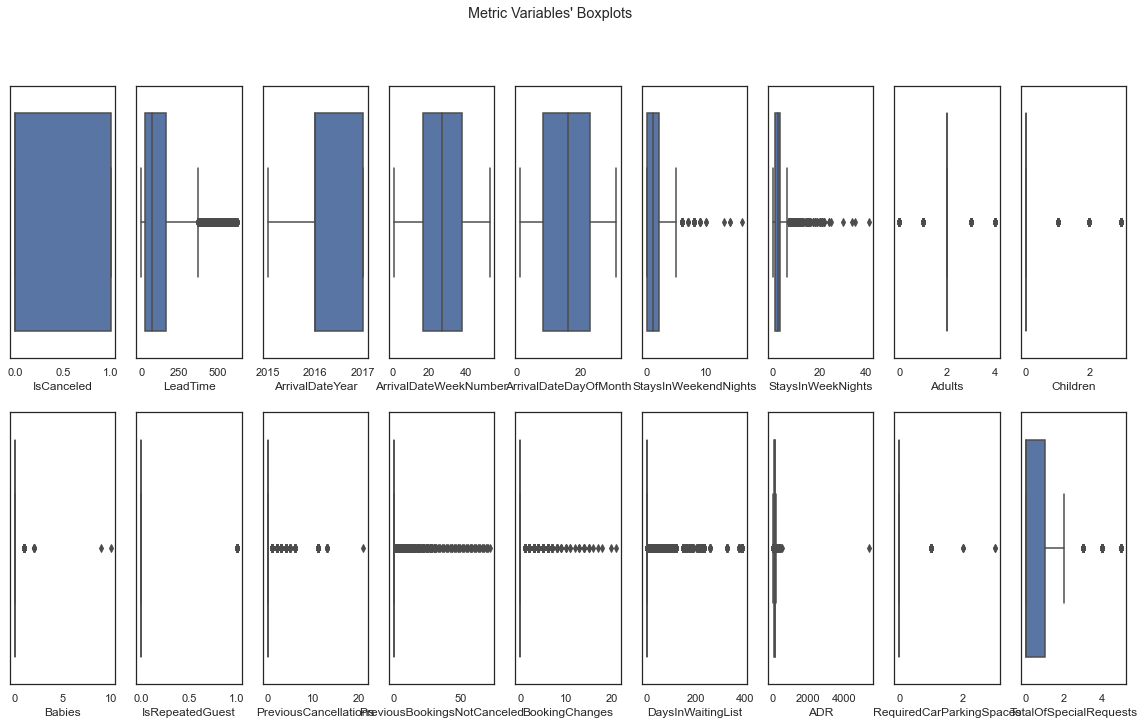

In [17]:
boxplot(data)

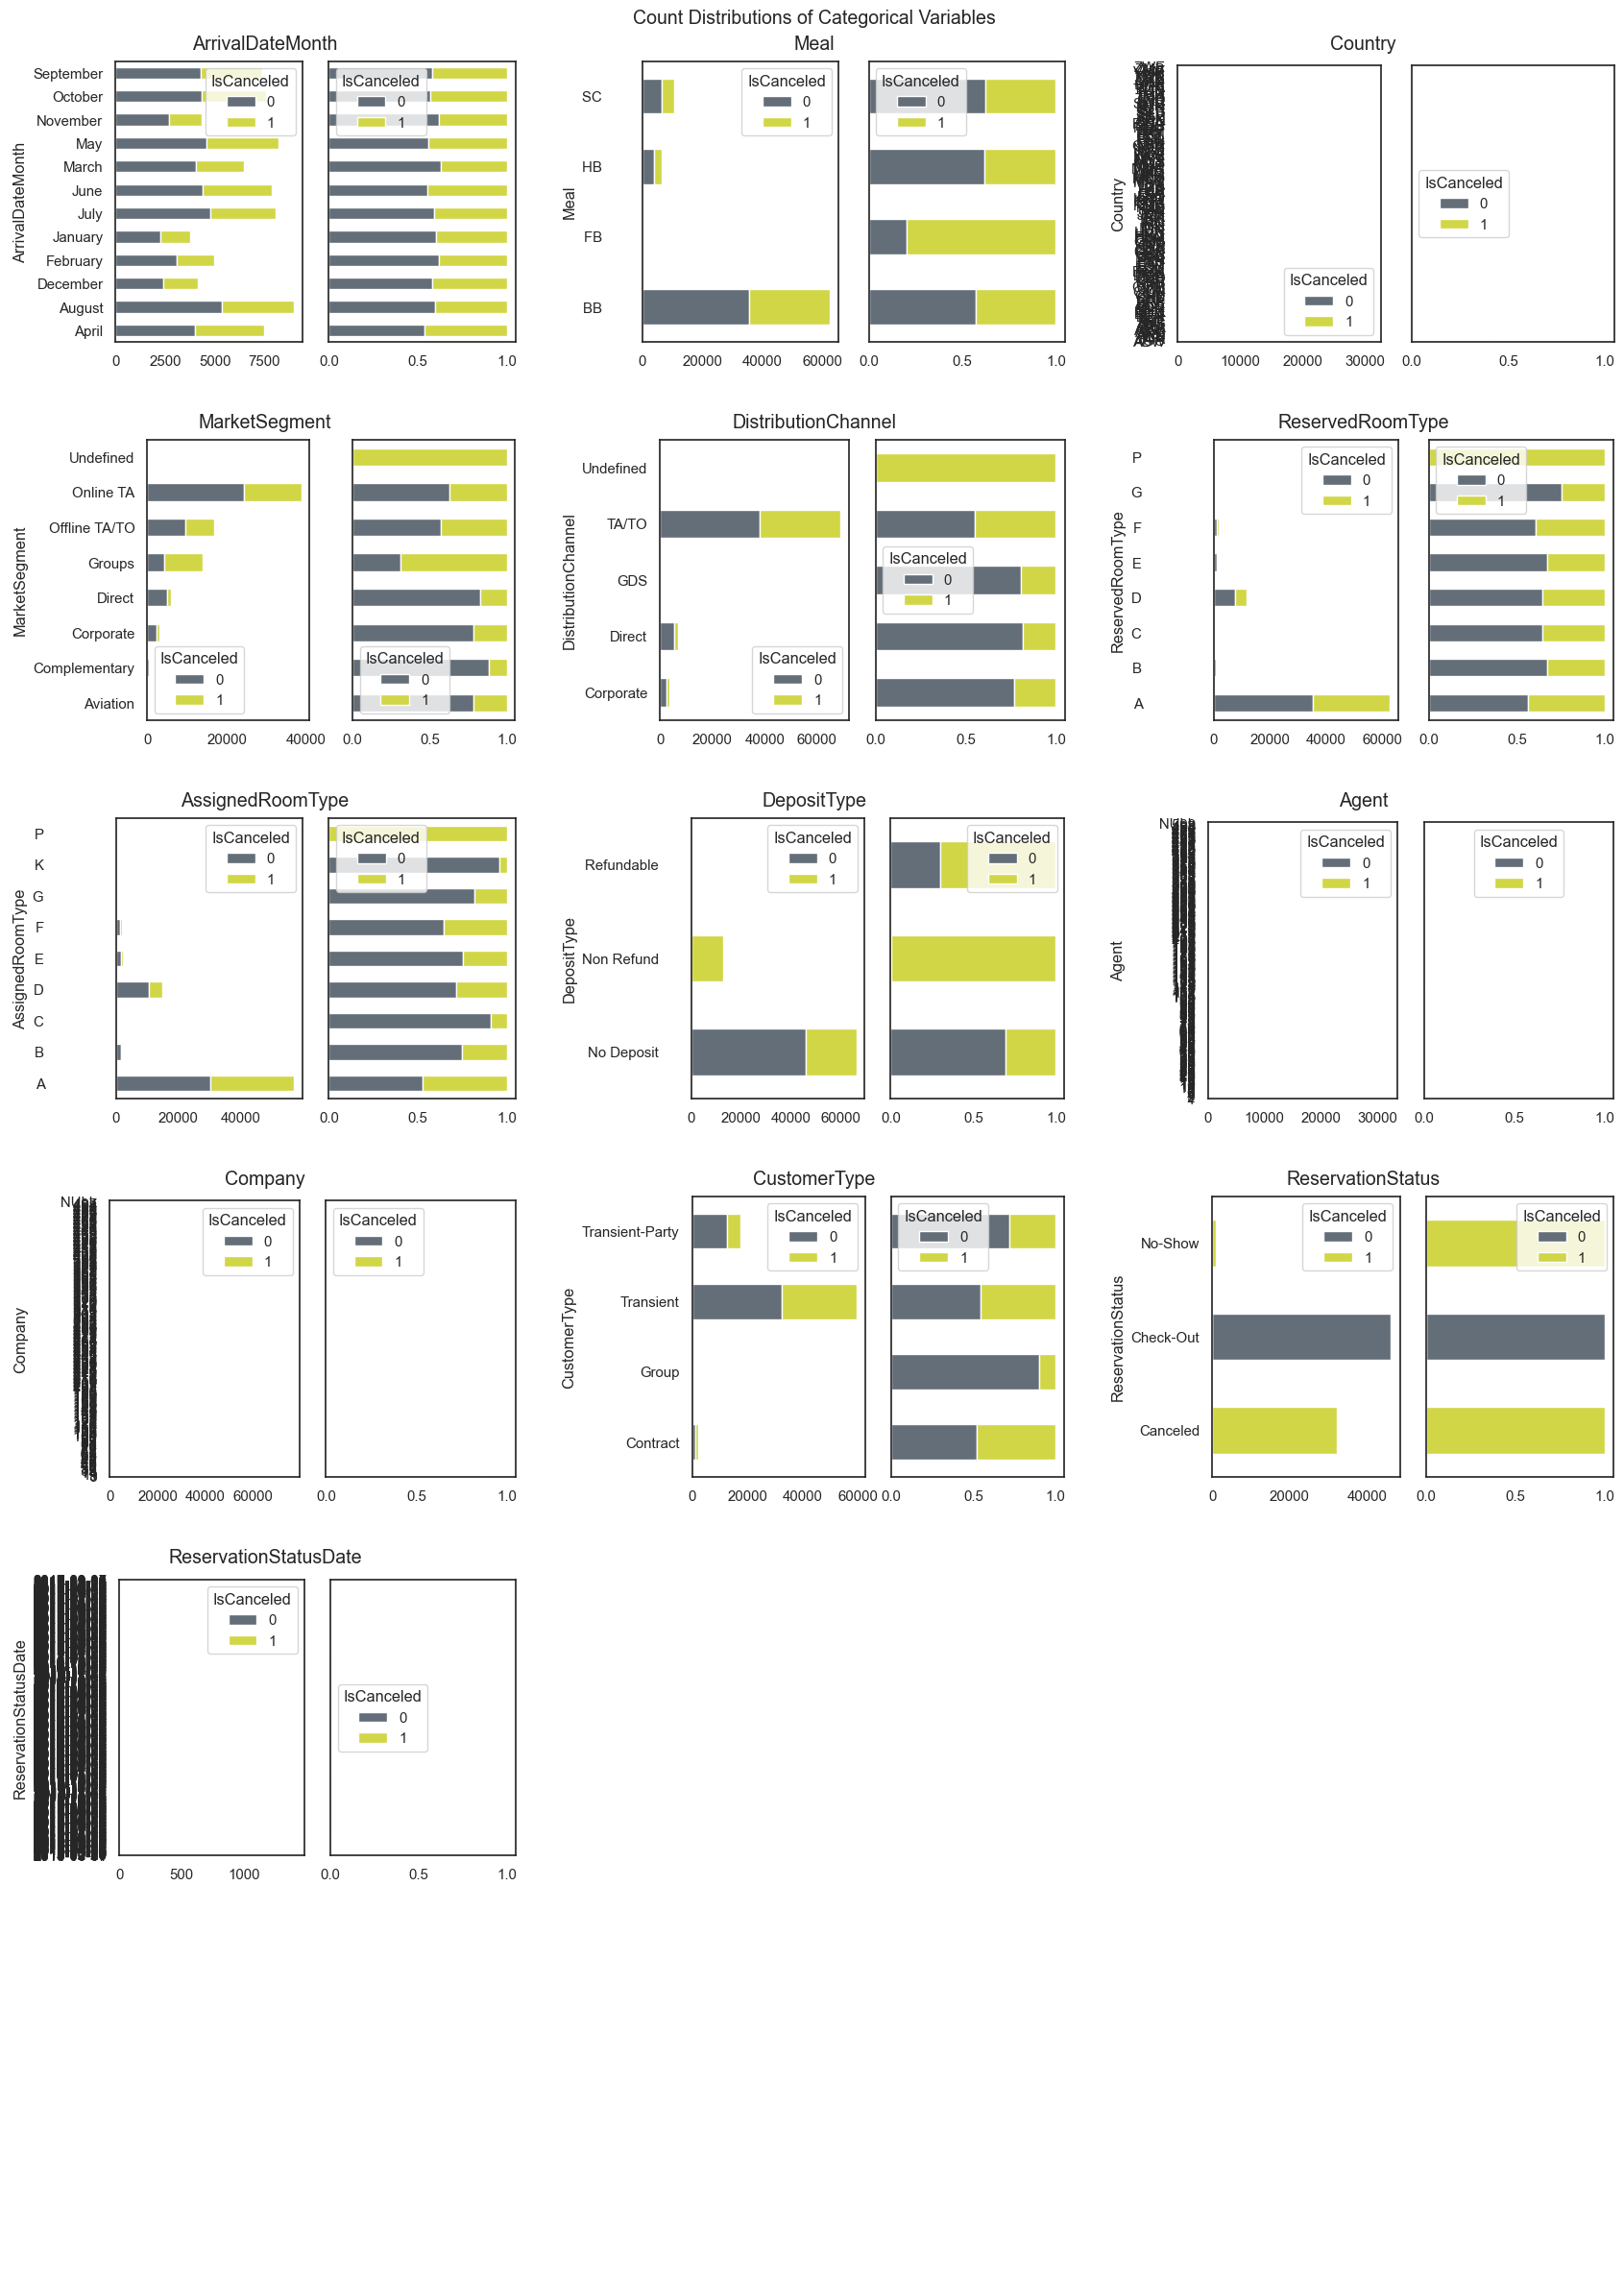

In [71]:
plot_cat_counts(data, categorical_features)

In [84]:
data.groupby("ReservedRoomType")["ADR"].count()

ReservedRoomType
A                   62595
B                    1115
C                      14
D                   11768
E                    1553
F                    1791
G                     484
P                      10
Name: ADR, dtype: int64

In [88]:
data[(data["AssignedRoomType"] == "P               ")]
# data.ReservedRoomType.unique()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
20591,1,0,2016,November,47,17,4,11,0,0.0,0,SC,NaN,Corporate,Direct,0,0,0,P,P,0,No Deposit,NULL,279,0,Transient,0.0,0,0,Canceled,2016-11-17
21184,1,0,2016,December,50,6,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NULL,279,0,Transient,0.0,0,0,Canceled,2016-12-06
21185,1,0,2016,December,50,6,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NULL,279,0,Transient,0.0,0,0,Canceled,2016-12-06
21189,1,0,2016,December,50,6,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NULL,279,0,Transient,0.0,0,0,Canceled,2016-12-06
25847,1,0,2017,April,15,10,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NULL,279,0,Transient,0.0,0,0,Canceled,2017-04-10
25848,1,0,2017,April,15,10,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NULL,279,0,Transient,0.0,0,0,Canceled,2017-04-10
25849,1,0,2017,April,15,10,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NULL,279,0,Transient,0.0,0,0,Canceled,2017-04-10
25850,1,0,2017,April,15,10,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NULL,279,0,Transient,0.0,0,0,Canceled,2017-04-10
32907,1,0,2017,August,32,11,0,0,0,0.0,0,SC,PRT,Online TA,TA/TO,0,0,0,P,P,0,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Canceled,2017-08-11
32908,1,0,2017,August,32,11,0,0,0,0.0,0,SC,PRT,Online TA,TA/TO,0,0,0,P,P,0,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Canceled,2017-08-11


In [45]:
# data.value_counts("ADR")#.iloc[0]
data.loc[data["ADR"] == 0]#.value_counts("ReservationStatus")

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
134,1,0,2015,July,29,15,0,1,2,0.0,0,SC,PRT,Direct,Direct,0,0,0,A,F,0,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Canceled,2015-07-15
139,0,0,2015,July,29,15,2,5,2,0.0,0,SC,PRT,Direct,Direct,0,0,0,F,A,4,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-22
166,0,18,2015,July,29,18,1,1,1,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1,NULL,0,Transient-Party,0.0,0,0,Check-Out,2015-07-20
196,0,12,2015,July,29,18,2,2,1,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1,NULL,0,Transient-Party,0.0,0,0,Check-Out,2015-07-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78571,0,78,2017,August,34,23,0,0,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,K,7,No Deposit,98,NULL,0,Transient-Party,0.0,0,0,Check-Out,2017-08-23
78702,0,1,2017,August,34,24,0,1,2,1.0,0,BB,PRT,Complementary,Direct,0,0,0,A,D,1,No Deposit,NULL,NULL,0,Transient,0.0,0,3,Check-Out,2017-08-25
78903,0,1,2017,August,35,27,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2017-08-27
79042,0,518,2017,August,34,26,2,1,1,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,229,NULL,0,Transient-Party,0.0,0,0,Check-Out,2017-08-29


In [54]:
#checking if for the same date we have different values of ADR

grouped = data.groupby(["ArrivalDateYear", "ArrivalDateMonth", "ArrivalDateDayOfMonth", "ADR"]).mean()
grouped.head(12)

IsCanceled  \
ArrivalDateYear ArrivalDateMonth ArrivalDateDayOfMonth ADR                  
2015            August           1                     36.25     0.000000   
                                                       72.50     0.000000   
                                                       75.00     0.000000   
                                                       76.50     0.500000   
                                                       80.75     0.000000   
                                                       85.50     1.000000   
                                                       89.75     0.000000   
                                                       94.50     0.727273   
                                                       138.50    0.000000   
                                 2                     0.00      0.000000   
                                                       76.50     0.000000   
                                 3                     0.00      0.166667   

                                                                 LeadTime  \
ArrivalDateYear ArrivalDateMonth ArrivalDateDayOfMonth ADR                  
2015            August           1                     36.25     4.000000   
                                                       72.50   117.000000   
                                                       75.00     0.000000   
                                                       76.50   131.250000   
                                                       80.75   117.000000   
                                                       85.50   130.000000   
                                                       89.75   117.000000   
                                                       94.50   101.318182   
                                                       138.50  117.000000   
                                 2                     0.00      2.666667   
                                                       76.50   127.666667   
                                 3                     0.00     36.000000   

                                                               ArrivalDateWeekNumber  \
ArrivalDateYear ArrivalDateMonth ArrivalDateDayOfMonth ADR                             
2015            August           1                     36.25                    31.0   
                                                       72.50                    31.0   
                                                       75.00                    31.0   
                                                       76.50                    31.0   
                                                       80.75                    31.0   
                                                       85.50                    31.0   
                                                       89.75                    31.0   
                                                       94.50                    31.0   
                                                       138.50                   31.0   
                                 2                     0.00                     32.0   
                                                       76.50                    32.0   
                                 3                     0.00                     32.0   

                                                               StaysInWeekendNights  \
ArrivalDateYear ArrivalDateMonth ArrivalDateDayOfMonth ADR                            
2015            August           1                     36.25                    2.0   
                                                       72.50                    2.0   
                                                       75.00                    0.0   
                                                       76.50                    2.0   
                                                       80.75                    2.0   
                                                       85.50   

In [57]:
data.loc[(data["ArrivalDateYear"] == 2015) &
(data["ArrivalDateMonth"] == "August") & 
(data["ArrivalDateDayOfMonth"] == 2)].sort_values("ADR")

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
534,0,2,2015,August,32,2,1,0,1,0.0,0,BB,AGO,Complementary,Direct,0,0,0,E,D,0,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-08-03
36569,0,3,2015,August,32,2,1,0,1,0.0,0,BB,PRT,Complementary,Corporate,0,0,0,A,D,0,No Deposit,NULL,NULL,0,Transient,0.0,0,1,Check-Out,2015-08-03
36582,0,3,2015,August,32,2,1,0,1,0.0,0,BB,PRT,Complementary,TA/TO,0,0,0,A,D,0,No Deposit,NULL,NULL,0,Transient,0.0,0,1,Check-Out,2015-08-03
535,0,83,2015,August,32,2,2,1,2,0.0,0,BB,BEL,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,1,Check-Out,2015-08-05
36589,0,150,2015,August,32,2,2,0,2,0.0,0,BB,BEL,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient-Party,76.5,0,1,Check-Out,2015-08-04
36590,0,150,2015,August,32,2,2,0,2,0.0,0,BB,BEL,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient-Party,76.5,0,1,Check-Out,2015-08-04


In [61]:
data.loc[(data["ADR"] == 0) & (data["MarketSegment"] != "Complementary")]
data.loc[(data["ADR"] == 0)].value_counts("MarketSegment")

MarketSegment
Complementary    508
Offline TA/TO    236
Online TA        173
Groups           144
Direct           111
Corporate         30
Aviation           6
dtype: int64

In [63]:
data.loc[data["MarketSegment"] == "Complementary"].sort_values("ADR", ascending = False)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
37755,0,0,2015,September,39,26,1,1,1,0.0,0,BB,PRT,Complementary,Direct,0,0,0,A,A,1,No Deposit,NULL,NULL,0,Transient,170.0,0,0,Check-Out,2015-09-28
45705,0,0,2016,March,13,20,1,0,2,0.0,0,BB,DEU,Complementary,TA/TO,0,0,0,A,E,0,No Deposit,NULL,NULL,0,Transient,139.0,0,0,Check-Out,2016-03-21
40489,1,8,2017,March,11,15,0,1,1,0.0,0,BB,PRT,Complementary,Direct,1,1,1,A,A,0,No Deposit,NULL,46,0,Transient,79.0,0,0,Canceled,2017-03-07
40071,0,2,2015,November,46,9,1,2,1,0.0,0,BB,USA,Complementary,Direct,0,0,0,A,A,0,No Deposit,45,NULL,0,Group,79.0,0,0,Check-Out,2015-11-12
61678,0,32,2016,November,47,15,0,2,2,0.0,0,BB,DEU,Complementary,Direct,0,0,0,E,E,0,No Deposit,NULL,NULL,0,Transient,75.0,0,1,Check-Out,2016-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38583,1,1,2015,October,42,13,0,1,1,0.0,0,BB,PRT,Complementary,Direct,0,0,0,A,A,0,No Deposit,NULL,NULL,0,Transient,0.0,0,1,Canceled,2015-10-13
38192,0,0,2016,April,17,21,0,1,1,0.0,0,BB,PRT,Complementary,Direct,1,0,1,G,G,0,No Deposit,NULL,45,0,Transient,0.0,0,0,Check-Out,2016-04-22
38191,0,8,2015,October,41,6,0,1,1,0.0,0,BB,PRT,Complementary,Direct,0,0,0,A,A,0,No Deposit,NULL,45,0,Transient,0.0,0,0,Check-Out,2015-10-07
38149,1,8,2015,October,41,6,0,1,1,0.0,0,BB,PRT,Complementary,Direct,0,0,0,A,A,0,No Deposit,NULL,45,0,Transient,0.0,0,0,No-Show,2015-10-06


In [62]:
data.value_counts("MarketSegment")

MarketSegment
Online TA        38748
Offline TA/TO    16747
Groups           13975
Direct            6093
Corporate         2986
Complementary      542
Aviation           237
Undefined            2
dtype: int64

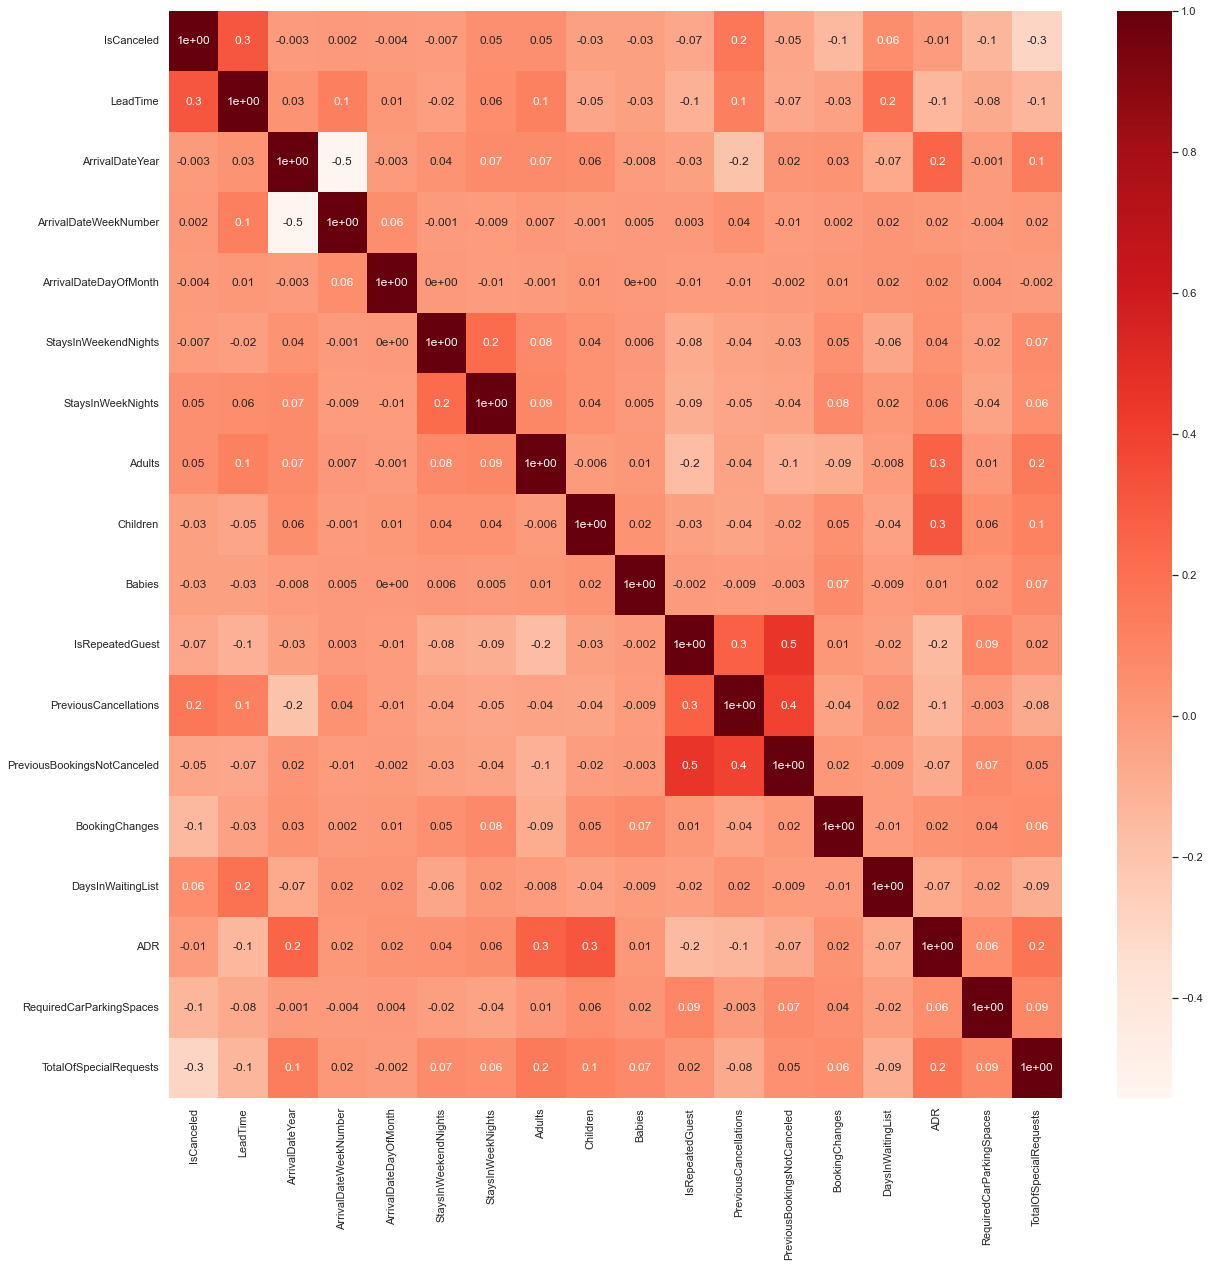

In [18]:
def cor_heatmap(cor):
    plt.figure(figsize=(20,20))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()
    
cor_heatmap(np.round(data[metric_features].corr(),3))

TypeError: 'value' must be an instance of str or bytes, not a float

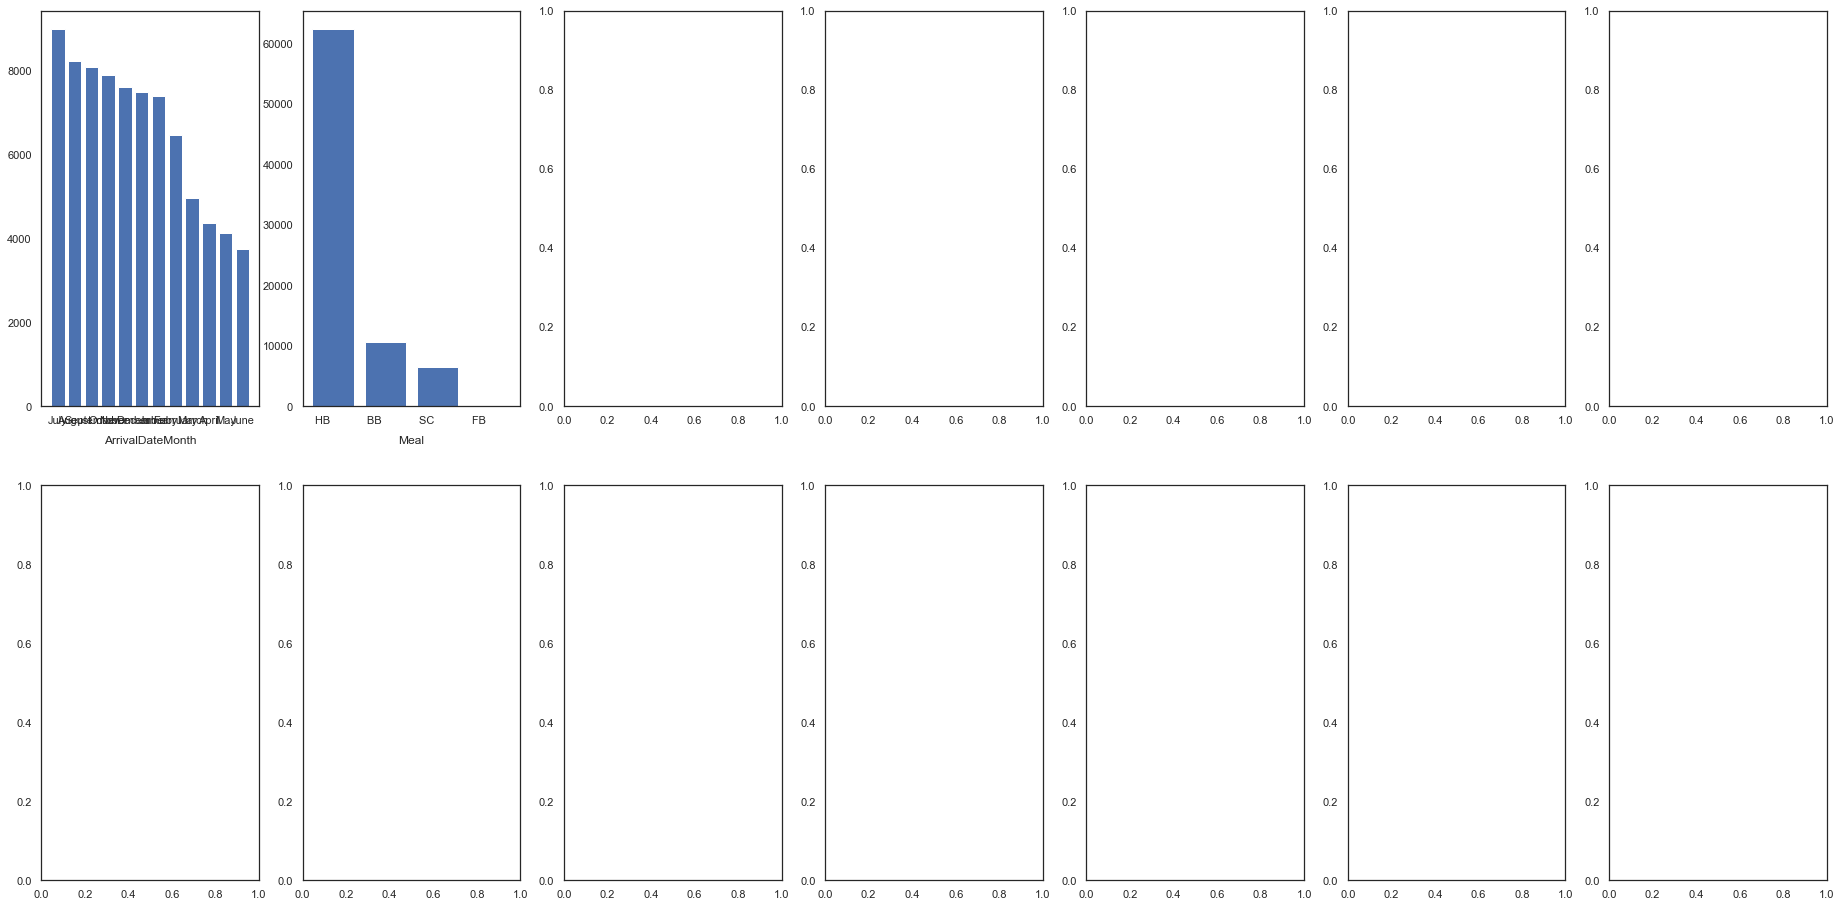

In [65]:
sns.set(style='white')

fig, axes = plt.subplots(2, ceil(len(categorical_features) / 2), figsize=(32, 16))

for ax, feat in zip(axes.flatten(), categorical_features):
    ax.bar(x=data[feat].unique(), height = data[feat].value_counts())
    ax.set_title(feat, y=-0.11)
    
title = "Categorical Variables' Barplots"
plt.suptitle(title)
plt.show()